<a href="https://colab.research.google.com/github/Amara-4312/CDC-predictive-modeling-2015/blob/main/Predictive_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [13]:
df = pd.read_csv('brfss2015_tidy.csv')
df.head()

,age,sex,education,income,employment,BMI,BMI_cat,ever_high_bp,ever_high_chol,any_exercise,ever_100_cigs,current_smoker,any_alcohol,diabetes_dx,prediabetes_dx,_LLCPWT,_WT2RAKE,_RAWRAKE,_STSTR,_PSU
0,63.0,Female,HS/GED,$15–20k,NaN,40.18,Obese,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,341.384853,86.344681,3.0,11011.0,2.015000e+09
1,52.0,Female,College 4+,<$10k,Out of work >1y,25.09,Overweight,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,108.060903,28.781560,1.0,11011.0,2.015000e+09
2,71.0,Female,HS/GED,NaN,NaN,22.04,Normal,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,255.264797,57.563120,2.0,11011.0,2.015000e+09
3,63.0,Female,HS/GED,NaN,NaN,28.19,Overweight,1.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,341.384853,86.344681,3.0,11011.0,2.015000e+09
4,61.0,Female,Some college,NaN,NaN,24.37,Normal,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,258.682223,57.563120,2.0,11011.0,2.015000e+09


In [14]:
# 1. Prepare data
# -------------------
df_model = df.copy()

In [15]:
# Drop rows where target is missing
df_model = df_model.dropna(subset=['diabetes_dx'])
y = df_model['diabetes_dx'].astype(int)


In [16]:
# Drop ID-like or target columns
X = df_model.drop(columns=['diabetes_dx'])

In [17]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

print("Shape of features after encoding:", X.shape)

Shape of features after encoding: (14077, 33)


In [18]:
# Impute missing values with the median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns) # Convert back to DataFrame to keep column names

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE class distribution:\n", y_train.value_counts())
print("After SMOTE class distribution:\n", y_train_res.value_counts())

Before SMOTE class distribution:
 diabetes_dx
0    9534
1    1727
Name: count, dtype: int64
After SMOTE class distribution:
 diabetes_dx
0    9534
1    9534
Name: count, dtype: int64


In [20]:
# -------------------
# 4. Scale features (important for Logistic Regression)
# -------------------
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [21]:
# -------------------
# 4. Scale features (important for Logistic Regression)
# -------------------
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [22]:
# 5. Logistic Regression model
# -------------------
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train_res_scaled, y_train_res)

LogisticRegression(max_iter=1000, solver='liblinear')

In [23]:
# 6. Evaluation
# -------------------
y_pred = log_reg.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      2384
           1       0.34      0.78      0.47       432

    accuracy                           0.73      2816
   macro avg       0.64      0.75      0.64      2816
weighted avg       0.85      0.73      0.77      2816


Confusion Matrix:
[[1718  666]
 [  94  338]]


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Split features and target
X = df.drop("diabetes_dx", axis=1)
y = df["diabetes_dx"]



In [25]:
# 2. Handle missing target
X = X[y.notna()]
y = y[y.notna()]


In [26]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [27]:
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

In [30]:
# 5. Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values with the median for numerical features
# and a constant value for categorical features
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='constant', fill_value='missing')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[('imputer', imputer_num), ('scaler', StandardScaler())]), num_cols),
        ("cat", Pipeline(steps=[('imputer', imputer_cat), ('onehot', OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
    ],
    remainder='passthrough' # Keep other columns not specified
)

In [31]:
# 6. Pipeline with SMOTE + RandomForest
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

In [32]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      2384
         1.0       0.50      0.33      0.40       432

    accuracy                           0.85      2816
   macro avg       0.69      0.64      0.66      2816
weighted avg       0.83      0.85      0.83      2816

Confusion Matrix:
 [[2242  142]
 [ 289  143]]


Tuning and Turnig up the Weights

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Preprocess training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply SMOTE to processed training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

# Train with class_weight="balanced"
rf_balanced = RandomForestClassifier(
    class_weight="balanced",
    random_state=42,
    n_estimators=200,
    max_depth=None
)

rf_balanced.fit(X_train_res, y_train_res)

# Predictions
X_test_processed = preprocessor.transform(X_test)
y_pred_balanced = rf_balanced.predict(X_test_processed)

# Evaluate
print("Classification Report (Balanced RF):")
print(classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))

Classification Report (Balanced RF):
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2384
         1.0       0.48      0.30      0.37       432

    accuracy                           0.84      2816
   macro avg       0.68      0.62      0.64      2816
weighted avg       0.82      0.84      0.83      2816

Confusion Matrix:
[[2244  140]
 [ 304  128]]


In [38]:
import numpy as np

# Preprocess test data
X_test_processed = preprocessor.transform(X_test)

# Predict probabilities
y_proba = rf_balanced.predict_proba(X_test_processed)[:, 1]

# Try a lower threshold (e.g. 0.3)
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)

# Evaluate
print(f"Classification Report (Threshold={threshold}):")
print(classification_report(y_test, y_pred_thresh))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))

Classification Report (Threshold=0.3):
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86      2384
         1.0       0.38      0.63      0.47       432

    accuracy                           0.78      2816
   macro avg       0.65      0.72      0.67      2816
weighted avg       0.84      0.78      0.80      2816

Confusion Matrix:
[[1932  452]
 [ 160  272]]


   Threshold  Precision    Recall        F1   ROC-AUC
0        0.1   0.237870  0.930556  0.378888  0.817245
1        0.2   0.322581  0.833333  0.465116  0.817245
2        0.3   0.379261  0.618056  0.470070  0.817245
3        0.4   0.445808  0.504630  0.473398  0.817245
4        0.5   0.480144  0.307870  0.375176  0.817245
5        0.6   0.536913  0.185185  0.275387  0.817245
6        0.7   0.600000  0.076389  0.135524  0.817245
7        0.8   0.500000  0.013889  0.027027  0.817245
8        0.9   0.500000  0.002315  0.004608  0.817245


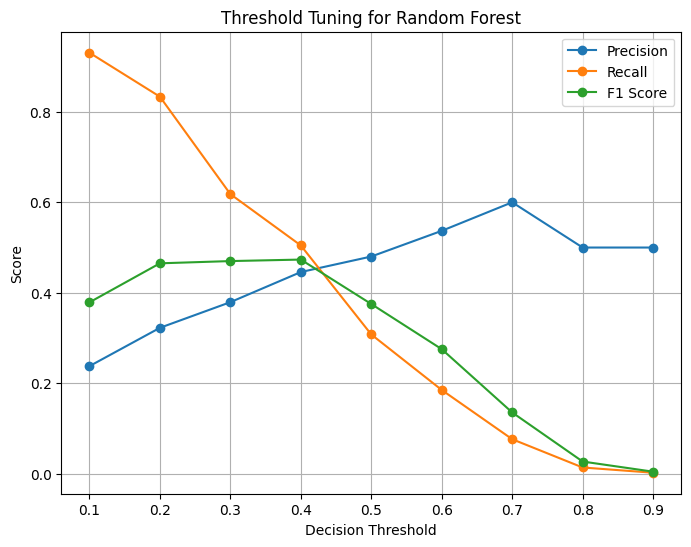

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

# Predict probabilities instead of hard classes
X_test_processed = preprocessor.transform(X_test)
y_probs = rf_balanced.predict_proba(X_test_processed)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 0.91, 0.1)

results = []

for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, y_pred_thresh, average="binary"
    )
    auc = roc_auc_score(y_test, y_probs)
    results.append((thresh, precision, recall, f1, auc))

# Convert to DataFrame for clarity
import pandas as pd
results_df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1", "ROC-AUC"])
print(results_df)

# Plot recall vs precision trade-off
plt.figure(figsize=(8,6))
plt.plot(results_df["Threshold"], results_df["Precision"], marker="o", label="Precision")
plt.plot(results_df["Threshold"], results_df["Recall"], marker="o", label="Recall")
plt.plot(results_df["Threshold"], results_df["F1"], marker="o", label="F1 Score")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning for Random Forest")
plt.legend()
plt.grid(True)
plt.show()

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Get predicted probabilities
X_test_processed = preprocessor.transform(X_test)
y_proba = rf_balanced.predict_proba(X_test_processed)[:, 1]

# 2. Apply custom threshold = 0.3
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)

# 3. Evaluate
print("Classification Report (Random Forest, threshold=0.3):")
print(classification_report(y_test, y_pred_custom))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

Classification Report (Random Forest, threshold=0.3):
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86      2384
         1.0       0.38      0.63      0.47       432

    accuracy                           0.78      2816
   macro avg       0.65      0.72      0.67      2816
weighted avg       0.84      0.78      0.80      2816

Confusion Matrix:
[[1932  452]
 [ 160  272]]
